In [ ]:
import pandas as pd

data= pd.read_csv('adj_kospi.csv', encoding='cp949')
data2 = pd.read_csv('pmi.csv')
df = pd.merge(data, data2, on = '연도', how = 'left')
#df.to_csv('kospi_pmi.csv', index=False, encoding='utf-8-sig')

In [ ]:
df['PMI'] = df['PMI']/100
df['실업률'] = df['실업률']/100
df['부채비율']=df['부채비율']/100
df['train_cagr(%)']=df['train_cagr(%)']/100
df['test_cagr(%)']=df['test_cagr(%)']/100
df['CAGR_tr(%)']=df['CAGR_tr(%)']/10000
df['자기자본 비율']=df['자기자본 비율']/100
df.drop(['증권명'],axis=1,inplace=True)

In [ ]:
df = df.drop(['Unnamed: 0','PMI','회사명', '거래소코드', '회계년도','평가사명 및 등급','train_cagr(%)','test_cagr(%)','CAGR_tr(%)','연도','CAGR_KOSPI',
         '신용스프레드','자산총계'], axis = 1)

In [ ]:
from sklearn.preprocessing import StandardScaler

# StandardScaler 객체 생성
scaler = StandardScaler()

# 특정 feature에 대한 통계 정보 계산하고 동시에 데이터 스케일링
df[['잉여현금흐름', 'Buffett','부채비율','유동비율','보통주식비율','ROCE']] = scaler.fit_transform(df[['잉여현금흐름', 'Buffett','부채비율','유동비율','보통주식비율','ROCE']])

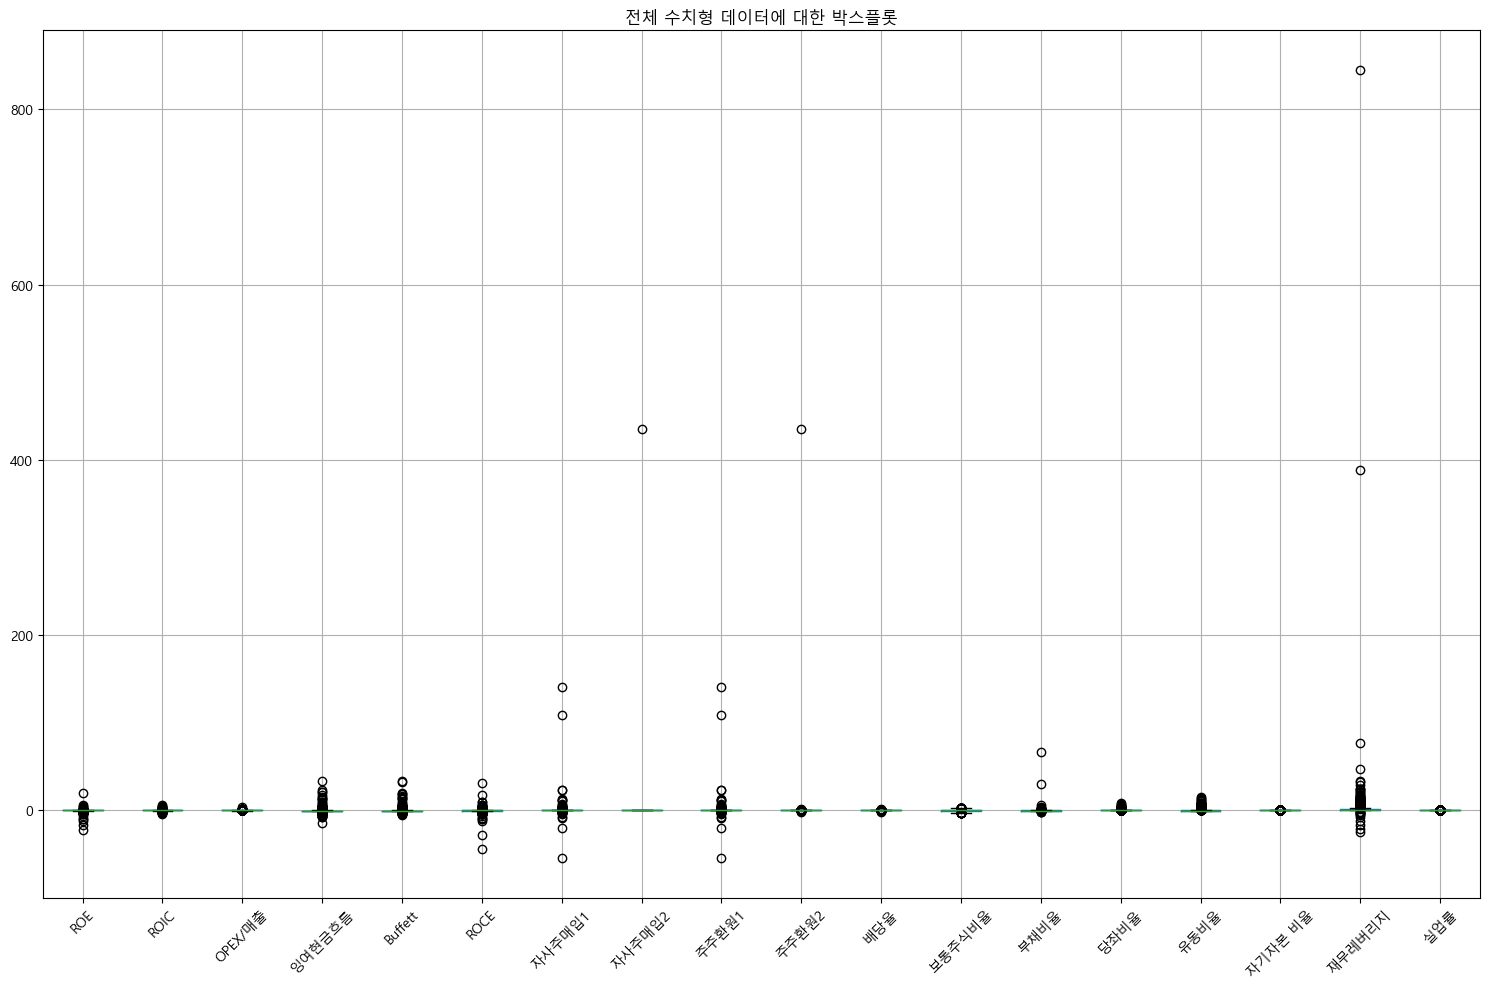

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# 모든 수치형 데이터 컬럼에 대한 박스플롯 그리기
plt.figure(figsize=(15, 10))
df[numeric_columns].boxplot()
plt.title('전체 수치형 데이터에 대한 박스플롯')
plt.xticks(rotation=45)  # x축 레이블 회전
plt.tight_layout()
plt.show()

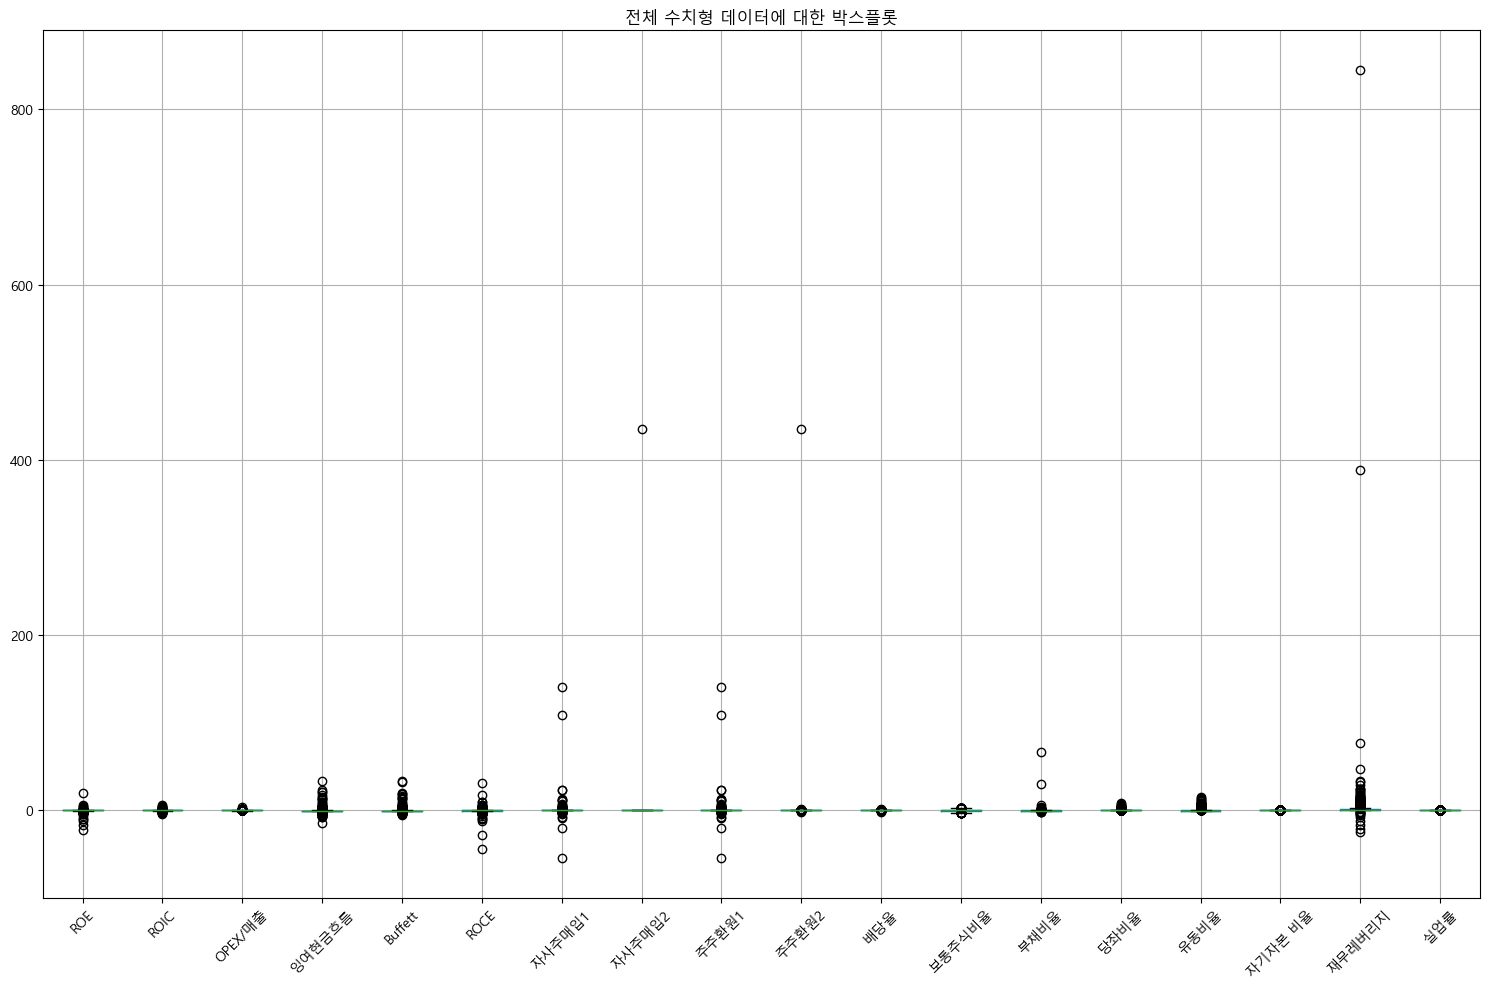

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# 모든 수치형 데이터 컬럼에 대한 박스플롯 그리기
plt.figure(figsize=(15, 10))
df[numeric_columns].boxplot()
plt.title('전체 수치형 데이터에 대한 박스플롯')
plt.xticks(rotation=45)  # x축 레이블 회전
plt.tight_layout()
plt.show()

In [ ]:
data= pd.read_csv('adj_kospi.csv', encoding='cp949')
data2 = pd.read_csv('pmi.csv')
df = pd.merge(data, data2, on = '연도', how = 'left')

In [ ]:
df['PMI'] = df['PMI']/100
df['ROCE'] = df['ROCE']/100
df['실업률'] = df['실업률']/100
df['부채비율']=df['부채비율']/100
df['train_cagr(%)']=df['train_cagr(%)']/100
df['test_cagr(%)']=df['test_cagr(%)']/100
df['CAGR_tr(%)']=df['CAGR_tr(%)']/10000
df['자기자본 비율']=df['자기자본 비율']/100
df.drop('증권명',axis=1,inplace=True)

In [ ]:
#보해양조 ROE값 대체
df.loc[(df.index == 221), 'ROE'] =df[df['거래소코드']==890]['ROE'][1:].mean()
#동양 ROE값 대체
df.loc[(df['거래소코드'] == 1520) & (df.index == 369), 'ROE'] = -0.0960458
df.loc[(df['거래소코드'] == 1520) & (df.index == 368), 'ROE'] = -0.0960458
df.loc[(df['거래소코드'] == 1520) & (df.index == 367), 'ROE'] = -0.0960458
#기억안남 ㅋ
df.loc[(df.index == 881), 'ROE'] = -0.11928771255776867
df.loc[(df.index == 882), 'ROE'] = -0.11928771255776867
#기억안남 ㅋ
df.loc[(df.index == 2018), 'ROE'] = -0.35633446493456955

# ROE 3 이상인 이상치 데이터 해당 값을 제외한 나머지 값 평균으로 평탄화.
#hj중공업
df.loc[(df.index == 5195), 'ROE'] = -0.23384595713555179
#이엠앤아이
df.loc[(df.index == 4844), 'ROE'] =-0.26219353673500395
df.loc[(df.index == 4845), 'ROE'] = -0.26219353673500395
#보해양조 ROE값 대체
df.loc[(df.index == 221), 'ROE'] =df[df['거래소코드']==890]['ROE'][1:].mean()
#동양 ROE값 대체
df.loc[(df['거래소코드'] == 1520) & (df.index == 369), 'ROE'] = -0.0960458
df.loc[(df['거래소코드'] == 1520) & (df.index == 368), 'ROE'] = -0.0960458
df.loc[(df['거래소코드'] == 1520) & (df.index == 367), 'ROE'] = -0.0960458
#기억안남 ㅋ
df.loc[(df.index == 881), 'ROE'] = -0.11928771255776867
df.loc[(df.index == 882), 'ROE'] = -0.11928771255776867
#기억안남 ㅋ
df.loc[(df.index == 2018), 'ROE'] = -0.35633446493456955
df.loc[(df.index == 2021), 'ROE'] = -0.35633446493456955
df.loc[(df.index == 2022), 'ROE'] = -0.35633446493456955
#에스지엔지 ROIC 이상치 수정
df.loc[(df.index == 3626), 'ROIC'] =0.12868591275883903

#부채비율 이상치
df.loc[(df.index == 2306), '부채비율'] = 5.19
df.loc[(df.index == 2309), '부채비율'] = 5.19
df.loc[(df.index == 2305), '부채비율'] = 5.19
df.loc[(df.index == 3495), '부채비율'] = 1.4
df.loc[(df.index == 3484), '부채비율'] = 1.4
#opex/매출
df[df['OPEX/매출']<0] #이거 기존에 나갔던 대손상각비가 +된 값임.
df.loc[(df.index == 3687), 'ROIC'] =0
#좋은건데, 그냥 보수적으로 보기 위해 0으로 수정.


#roce 너무 높은경우 0으로 처리하기
roce_index=df[df['ROCE']>2]['ROCE'].index
for i in roce_index:
    df.loc[(df.index == i), 'ROCE'] =0

# 100이상의 자사주 매입 1로 변환.
df.loc[(df.index == 1364), '자사주매입1'] = 1
df.loc[(df.index == 3131), '자사주매입1'] = 1
df.loc[(df.index == 3178), '자사주매입1'] = 0
df.loc[(df.index == 5127), '자사주매입1'] = 0
df.loc[(df.index == 1050), '자사주매입1'] = 0
df.loc[(df.index == 1678), '자사주매입1'] = 0
df.loc[(df.index == 138), '자사주매입1'] = 0.1
df.loc[(df.index == 530), '자사주매입1'] = 0
df.loc[(df.index == 4280), '자사주매입1'] = 0
df.loc[(df.index == 4692), '자사주매입1'] = 0
df.loc[(df.index == 5238), '자사주매입1'] = 0




In [ ]:
from sklearn.preprocessing import StandardScaler

# StandardScaler 객체 생성
scaler = StandardScaler()

# 특정 feature에 대한 통계 정보 계산하고 동시에 데이터 스케일링
df[['잉여현금흐름', 'Buffett','부채비율','유동비율','보통주식비율','자사주매입1']] = scaler.fit_transform(df[['잉여현금흐름', 'Buffett','부채비율','유동비율','보통주식비율','자사주매입1']])

In [ ]:
df = df.drop(['Unnamed: 0','PMI','회사명', '거래소코드', '회계년도','평가사명 및 등급','train_cagr(%)','test_cagr(%)','CAGR_tr(%)','연도','CAGR_KOSPI','자사주매입2','주주환원2','주주환원1',
         '재무레버리지', '신용스프레드','자기자본 비율','자산총계'], axis = 1)

C:\Users\ssoeo\AppData\Local\Temp\ipykernel_10168\2563535176.py:12: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()
C:\Users\ssoeo\AppData\Roaming\Python\Python38\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


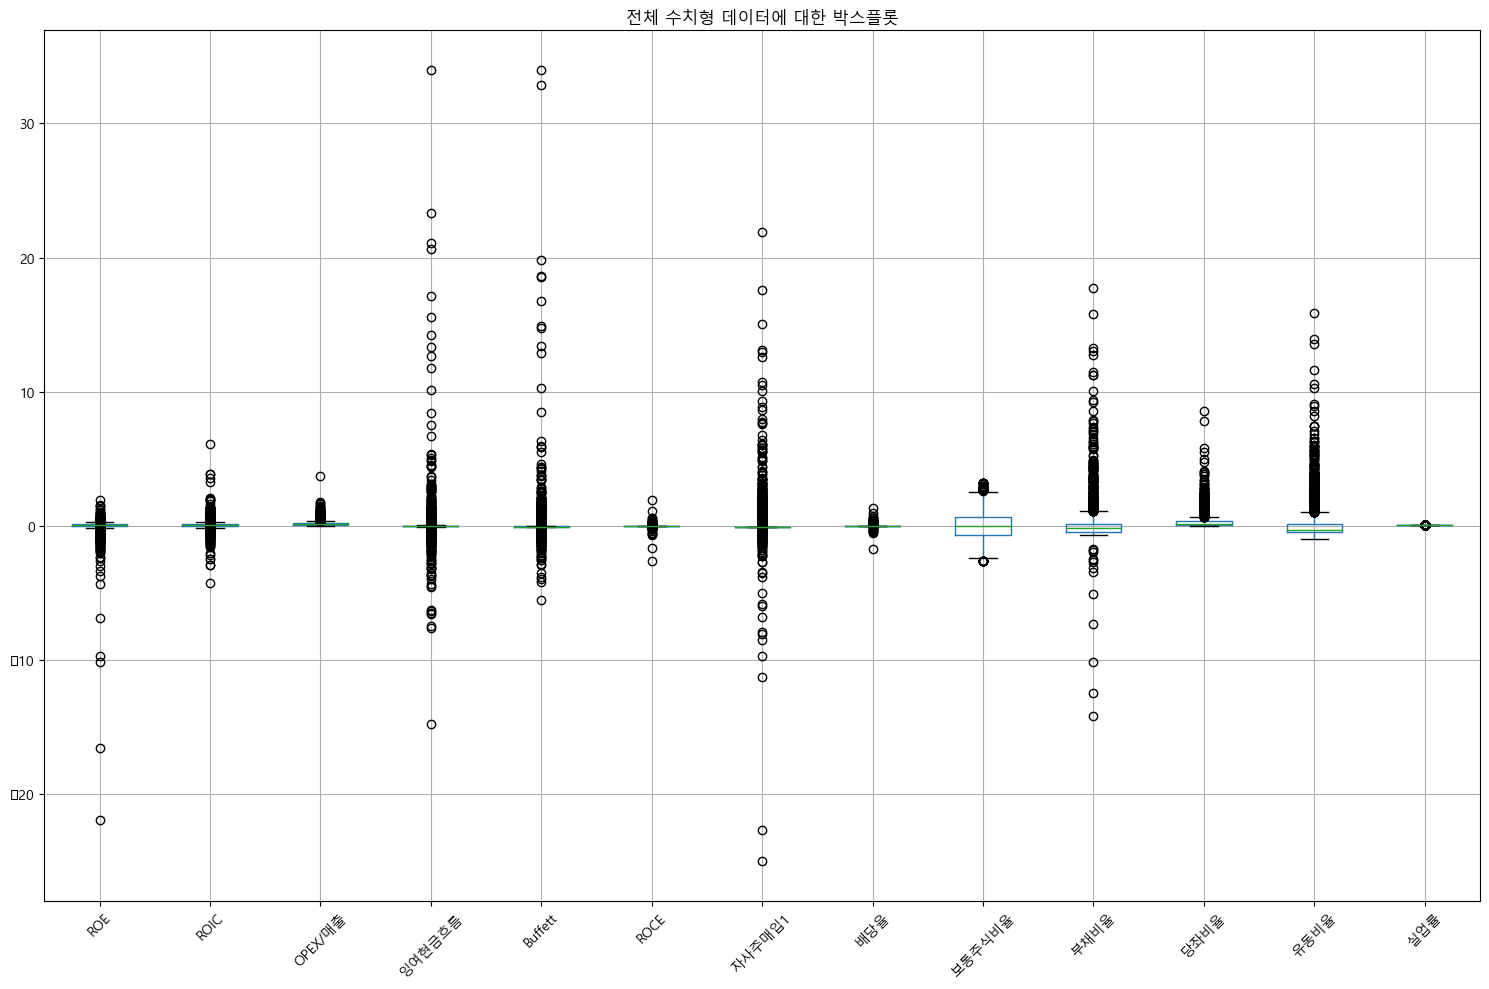

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# 모든 수치형 데이터 컬럼에 대한 박스플롯 그리기
plt.figure(figsize=(15, 10))
df[numeric_columns].boxplot()
plt.title('전체 수치형 데이터에 대한 박스플롯')
plt.xticks(rotation=45)  # x축 레이블 회전
plt.tight_layout()
plt.show()

In [ ]:
df[df['자사주매입1'] >20]

,ROE,ROIC,OPEX/매출,잉여현금흐름,Buffett,ROCE,자사주매입1,배당율,보통주식비율,신용등급,부채비율,당좌비율,유동비율,실업률
1643,0.004609,0.066589,0.163565,-0.672664,-0.396126,0.001936,21.886926,-0.0,-1.11495,AA,-0.327105,0.350451,-0.154548,0.036
